In [1]:
import sys
sys.version

'3.9.25 (main, Nov  3 2025, 22:44:01) [MSC v.1929 64 bit (AMD64)]'

# Tourism Experience Analytics

## Overview
This project focuses on understanding traveler behavior, preferences, and experiences using data-driven techniques. It helps tourism businesses improve customer satisfaction, optimize services, and make informed strategic decisions.

## Project Overview
This project analyzes tourist visit patterns, ratings, and preferences to derive meaningful insights. It applies data analysis, machine learning, and recommendations to enhance tourism experiences.

## Project Objectives
1. Predict tourist ratings using regression techniques
2. Classify visit modes based on user and attraction characteristics
3. Build a recommendation system to suggest attractions to users

In [2]:
# Project Configuration & Paths

import os
import numpy as np
import pandas as pd

# Display set-up
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

# Base project directory
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Data directories
DATA_DIR = os.path.join(BASE_DIR, "data")
RAW_DATA_DIR = os.path.join(DATA_DIR, "raw")
PROCESSED_DATA_DIR = os.path.join(DATA_DIR, "processed")

# Output directories
OUTPUTS_DIR = os.path.join(BASE_DIR, "outputs")

# Creating new folders
for path in [DATA_DIR, RAW_DATA_DIR, PROCESSED_DATA_DIR, OUTPUTS_DIR]:
    os.makedirs(path, exist_ok=True)

# Display paths for verification
BASE_DIR, RAW_DATA_DIR, PROCESSED_DATA_DIR, OUTPUTS_DIR

('C:\\Users\\deepa\\Documents\\Tourism_Experience_Analyticss',
 'C:\\Users\\deepa\\Documents\\Tourism_Experience_Analyticss\\data\\raw',
 'C:\\Users\\deepa\\Documents\\Tourism_Experience_Analyticss\\data\\processed',
 'C:\\Users\\deepa\\Documents\\Tourism_Experience_Analyticss\\outputs')

In [3]:
sorted(os.listdir(RAW_DATA_DIR))

['City.xlsx',
 'Continent.xlsx',
 'Country.xlsx',
 'Item.xlsx',
 'Mode.xlsx',
 'Region.xlsx',
 'Transaction.xlsx',
 'Type.xlsx',
 'Updated_Item.xlsx',
 'User.xlsx']

In [4]:
# Loading City dataset

city_df = pd.read_excel(os.path.join(RAW_DATA_DIR, "City.xlsx"))
city_df.shape, city_df.head()

((9143, 3),
    CityId      CityName  CountryId
 0       0             -          0
 1       1        Douala          1
 2       2  South Region          1
 3       3     N'Djamena          2
 4       4        Kigali          3)

In [5]:
# checking out on column names and data types
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9143 entries, 0 to 9142
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CityId     9143 non-null   int64 
 1   CityName   9142 non-null   object
 2   CountryId  9143 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 214.4+ KB


In [6]:
# check out in missing values 
city_df.isna().sum()

CityId       0
CityName     1
CountryId    0
dtype: int64

# City Dataset – My Observations

The City dataset contains 9,143 records with 3 columns, indicating that it functions as a lookup table for geographical information. Each city is uniquely identified using the `CityId`, which can be considered the primary key for this table.

The `CountryId` column establishes a relationship between cities and their respective countries, making this dataset useful for geographical hierarchy mapping during analysis. The `CityName` column stores the city names in text format, which is expected for descriptive location data.

From a data quality perspective, the dataset is largely clean. There are no missing values in the identifier columns (`CityId` and `CountryId`). However, one missing value is observed in the `CityName` column. This will be addressed during the data cleaning phase if required.

Overall, the City dataset will serve as a supporting dimension table, helping map user activity and tourist transactions to specific geographic locations in later stages of the project.

In [7]:
# Loading Country dataset

country_df = pd.read_excel(os.path.join(RAW_DATA_DIR, "Country.xlsx"))
country_df.shape, country_df.head()

((165, 3),
    CountryId   Country  RegionId
 0          0         -         0
 1          1  Cameroon         1
 2          2      Chad         1
 3          3    Rwanda         1
 4          4  Ethiopia         2)

In [8]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CountryId  165 non-null    int64 
 1   Country    165 non-null    object
 2   RegionId   165 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.0+ KB


In [9]:
country_df.isna().sum()

CountryId    0
Country      0
RegionId     0
dtype: int64

# Country Dataset – Initial Observations

The Country dataset contains 165 records and 3 columns, indicating that it serves as a higher-level geographical reference table. Each country is uniquely identified using the `CountryId`, which can be treated as the primary key.

The `RegionId` column establishes a hierarchical relationship between countries and regions, allowing geographic aggregation at a regional level during analysis. The `Country` column contains country names stored as text, which is appropriate for descriptive geographic data.

From a data quality perspective, the dataset is clean. No missing values are observed across any of the columns, and the data types are consistent and suitable for relational joins.

This dataset will be used to connect city-level data to broader regional groupings and will support geographic analysis and visualization in later stages of the project.

In [10]:
# Loading Region dataset

region_df = pd.read_excel(os.path.join(RAW_DATA_DIR, "Region.xlsx"))
region_df.shape, region_df.head()

((22, 3),
             Region  RegionId  ContinentId
 0                -         0            0
 1   Central Africa         1            1
 2      East Africa         2            1
 3     North Africa         3            1
 4  Southern Africa         4            1)

In [11]:
region_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Region       22 non-null     object
 1   RegionId     22 non-null     int64 
 2   ContinentId  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 656.0+ bytes


In [12]:
region_df.isna().sum()

Region         0
RegionId       0
ContinentId    0
dtype: int64

# Region Dataset – My initial observations

The Region dataset contains 22 records and 3 columns, representing an intermediate level in the geographical hierarchy. Each region is uniquely identified using the `RegionId`, which serves as a key for linking regions with countries.

The `ContinentId` column establishes a higher-level relationship between regions and continents, enabling multi-level geographic aggregation during analysis. The `Region` column contains descriptive region names and is stored as text, which is appropriate for categorical geographic data.

No missing values are present in this dataset, and all columns have consistent and valid data types. Given its small size and clean structure, this dataset is well-suited for use as a reference table in joins and geographic roll-up analysis.

In [13]:
# Loading Continent dataset

continent_df = pd.read_excel(os.path.join(RAW_DATA_DIR, "Continent.xlsx"))
continent_df.shape, continent_df.head()

((6, 2),
    ContinentId            Continent
 0            0                    -
 1            1               Africa
 2            2              America
 3            3                 Asia
 4            4  Australia & Oceania)

In [14]:
continent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ContinentId  6 non-null      int64 
 1   Continent    6 non-null      object
dtypes: int64(1), object(1)
memory usage: 224.0+ bytes


In [15]:
continent_df.isna().sum()

ContinentId    0
Continent      0
dtype: int64

# Continent Dataset – My Observations

The Continent dataset contains 6 records and 2 columns, representing the highest level of the geographic hierarchy used in this project. Each continent is uniquely identified using the `ContinentId`, which serves as a primary reference key for linking regions to broader geographic groupings.

The `Continent` column stores descriptive continent names and is appropriately stored as a categorical text field. The dataset is fully complete, with no missing values and consistent data types across all columns.

Due to its small size and clean structure, this dataset is ideal for use as a lookup table during hierarchical joins and aggregated analysis across regions, countries, and cities.

In [16]:
# Loading User dataset

user_df = pd.read_excel(os.path.join(RAW_DATA_DIR, "User.xlsx"))
user_df.shape, user_df.head()

((33530, 5),
    UserId  ContinentId  RegionId  CountryId  CityId
 0      14            5        20        155   220.0
 1      16            3        14        101  3098.0
 2      20            4        15        109  4303.0
 3      23            1         4         22   154.0
 4      25            3        14        101  3098.0)

In [17]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33530 entries, 0 to 33529
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   UserId       33530 non-null  int64  
 1   ContinentId  33530 non-null  int64  
 2   RegionId     33530 non-null  int64  
 3   CountryId    33530 non-null  int64  
 4   CityId       33526 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 1.3 MB


In [18]:
user_df.isna().sum()

UserId         0
ContinentId    0
RegionId       0
CountryId      0
CityId         4
dtype: int64

# User Dataset – My initial observation based on the output obtained

The User dataset contains 33,530 records and represents individual users along with their associated geographic identifiers. Each user is uniquely identified using the `UserId` column and is linked hierarchically to continent, region, country, and city levels.

All columns except `CityId` are fully populated, indicating consistent geographic coverage at higher levels. The `CityId` column contains a small number of missing values (4 records), which may represent users whose city-level information was unavailable or not captured during data collection.

The presence of missing values only at the city level suggests that broader geographic data remains reliable and intact. Since the proportion of missing city data is extremely small relative to the dataset size, this can be handled during preprocessing without significantly impacting downstream analysis.

Overall, the dataset is well-structured and suitable for joining with geographic reference tables for enriched analysis.

In [19]:
# Inspecting users with missing CityId
user_df[user_df["CityId"].isna()]

,UserId,ContinentId,RegionId,CountryId,CityId
2279,7175,5,17,135,NaN
6027,17595,1,4,22,NaN
21303,56972,5,17,135,NaN
25494,67461,5,17,135,NaN


# Handling Missing CityId Values

A small number of users (4 records) were found to have missing values in the `CityId` column, while all higher-level geographic identifiers (continent, region, and country) were present.

Given the extremely small proportion of missing values relative to the dataset size and the importance of city-level identifiers for downstream joins and analysis, these records are removed from the dataset. This avoids introducing assumptions through imputation and ensures consistency across geographic mappings.

The removal (dropping) of these records does not have a meaningful impact on the overall analysis.

In [20]:
# Dropping users with missing CityId
user_df = user_df.dropna(subset=["CityId"])

# Converting CityId back to integer after removal of NaNs
user_df["CityId"] = user_df["CityId"].astype(int)

# Verification
user_df.isna().sum(), user_df.dtypes

(UserId         0
 ContinentId    0
 RegionId       0
 CountryId      0
 CityId         0
 dtype: int64,
 UserId         int64
 ContinentId    int64
 RegionId       int64
 CountryId      int64
 CityId         int64
 dtype: object)

In [21]:
user_df.dtypes

UserId         int64
ContinentId    int64
RegionId       int64
CountryId      int64
CityId         int64
dtype: object

In [22]:
# Loading Item dataset
item_df = pd.read_excel(os.path.join(RAW_DATA_DIR, "Item.xlsx"))

item_df.shape, item_df.head()

((30, 5),
    AttractionId  AttractionCityId  AttractionTypeId  \
 0           369                 1                13   
 1           481                 1                13   
 2           640                 1                63   
 3           650                 1                13   
 4           673                 1                13   
 
                        Attraction  \
 0               Kuta Beach - Bali   
 1                  Nusa Dua Beach   
 2  Sacred Monkey Forest Sanctuary   
 3                     Sanur Beach   
 4                  Seminyak Beach   
 
                                 AttractionAddress  
 0                                            Kuta  
 1  Semenanjung Nusa Dua, Nusa Dua 80517 Indonesia  
 2         Jl. Monkey Forest, Ubud 80571 Indonesia  
 3                                           Sanur  
 4                                        Seminyak  )

In [23]:
# Checking column names, data types, and null counts
item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   AttractionId       30 non-null     int64 
 1   AttractionCityId   30 non-null     int64 
 2   AttractionTypeId   30 non-null     int64 
 3   Attraction         30 non-null     object
 4   AttractionAddress  30 non-null     object
dtypes: int64(3), object(2)
memory usage: 1.3+ KB


In [24]:
# Checking missing values
item_df.isna().sum()

AttractionId         0
AttractionCityId     0
AttractionTypeId     0
Attraction           0
AttractionAddress    0
dtype: int64

In [25]:
# Verifying uniqueness of AttractionId
item_df["AttractionId"].nunique(), item_df.shape[0]

(30, 30)

### Item (Attraction) Dataset – Interpretation

The Item dataset contains information about tourist attractions available in the system. Each record represents a unique attraction, identified by `AttractionId`.

The dataset includes the attraction name, its city reference (`AttractionCityId`), type (`AttractionTypeId`), and address details. All fields are complete with no missing values, and `AttractionId` is unique across all records.

This table acts as a reference dataset and will be used later for recommendation generation and for linking user interactions with specific attractions.

In [26]:
# Type Dataset

type_df = pd.read_excel(os.path.join(RAW_DATA_DIR, "Type.xlsx"))
type_df.shape, type_df.head()

((17, 2),
    AttractionTypeId         AttractionType
 0                 2          Ancient Ruins
 1                10                Ballets
 2                13                Beaches
 3                19        Caverns & Caves
 4                34  Flea & Street Markets)

In [27]:
# Checking column names, data types, and null counts
type_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   AttractionTypeId  17 non-null     int64 
 1   AttractionType    17 non-null     object
dtypes: int64(1), object(1)
memory usage: 400.0+ bytes


In [28]:
# Checking missing values
type_df.isna().sum()

AttractionTypeId    0
AttractionType      0
dtype: int64

In [29]:
# Verifying uniqueness of AttractionTypeId
type_df["AttractionTypeId"].nunique(), type_df.shape[0]

(17, 17)

### Type (Attraction Category) Dataset – Interpretation

The Type dataset represents the categories of tourist attractions, with each category uniquely identified by `AttractionTypeId`. Examples include beaches, ruins, caves, and markets.

The dataset is well-structured with no missing values, and all attraction type identifiers are unique. This makes it suitable as a reference table for categorizing attractions during exploratory analysis, classification, and recommendation system development.

In [30]:
# Loading Mode dataset
mode_df = pd.read_excel(os.path.join(RAW_DATA_DIR, "Mode.xlsx"))
mode_df.shape, mode_df.head()

((6, 2),
    VisitModeId VisitMode
 0            0         -
 1            1  Business
 2            2   Couples
 3            3    Family
 4            4   Friends)

In [31]:
# Checking column names, data types, and null counts
mode_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   VisitModeId  6 non-null      int64 
 1   VisitMode    6 non-null      object
dtypes: int64(1), object(1)
memory usage: 224.0+ bytes


In [32]:
# Checking missing values
mode_df.isna().sum()

VisitModeId    0
VisitMode      0
dtype: int64

In [33]:
# Verifying uniqueness of VisitModeId
mode_df["VisitModeId"].nunique(), mode_df.shape[0]

(6, 6)

## Mode (Visit Type) Dataset – Interpretation

The Mode dataset represents the type or purpose of a tourist visit, such as Business, Family, Couples, or Friends. Each visit type is uniquely identified using `VisitModeId`.

The dataset is complete, contains no missing values, and has a one-to-one mapping between visit mode identifiers and labels. This makes it suitable for use as a target reference in the classification task, where visit mode will be predicted based on user demographics and attraction-related features.

In [34]:
# Loading Transaction dataset

transaction_df = pd.read_excel(os.path.join(RAW_DATA_DIR, "Transaction.xlsx"))
transaction_df.shape, transaction_df.head()

((52930, 7),
    TransactionId  UserId  VisitYear  VisitMonth  VisitMode  AttractionId  \
 0              3   70456       2022          10          2           640   
 1              8    7567       2022          10          4           640   
 2              9   79069       2022          10          3           640   
 3             10   31019       2022          10          3           640   
 4             15   43611       2022          10          2           640   
 
    Rating  
 0       5  
 1       5  
 2       5  
 3       3  
 4       3  )

In [35]:
# Checking out on column names, data types, and null counts
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52930 entries, 0 to 52929
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   TransactionId  52930 non-null  int64
 1   UserId         52930 non-null  int64
 2   VisitYear      52930 non-null  int64
 3   VisitMonth     52930 non-null  int64
 4   VisitMode      52930 non-null  int64
 5   AttractionId   52930 non-null  int64
 6   Rating         52930 non-null  int64
dtypes: int64(7)
memory usage: 2.8 MB


In [36]:
# Checking missing values
transaction_df.isna().sum()

TransactionId    0
UserId           0
VisitYear        0
VisitMonth       0
VisitMode        0
AttractionId     0
Rating           0
dtype: int64

In [37]:
# Verifying uniqueness of TransactionId
transaction_df["TransactionId"].nunique(), transaction_df.shape[0]

(52930, 52930)

In [38]:
# Checking rating distribution
transaction_df["Rating"].describe()

count    52930.000000
mean         4.157699
std          0.970543
min          1.000000
25%          4.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

## Transaction Dataset – Human Interpretation

The transaction dataset acts as the central fact table of this project, capturing user interactions with tourist attractions. Each record represents a single visit event, uniquely identified by TransactionId.

The dataset contains 52,930 transactions with no missing values across any columns, indicating high data reliability. All identifiers such as UserId, AttractionId, and VisitMode are stored as integers, ensuring consistency with their respective dimension tables.

Ratings range from 1 to 5, with an average rating of approximately 4.16. This indicates that most users had positive experiences, which is typical for tourism-related datasets. The absence of outliers or invalid rating values confirms that the dataset is suitable for downstream regression, classification, and recommendation modeling.

Overall, the transaction dataset is clean, well-structured, and ready for integration with other datasets for exploratory analysis and predictive modeling.

In [39]:
# Checking foreign key consistency
set(transaction_df["UserId"]) - set(user_df["UserId"])

{7175, 17595, 56972, 67461}

In [40]:
# Removing transactions with invalid UserId references
valid_user_ids = set(user_df["UserId"])

transaction_df = transaction_df[transaction_df["UserId"].isin(valid_user_ids)]

# Verification
transaction_df.shape, transaction_df["UserId"].nunique()

((52922, 7), 33526)

In [41]:
set(transaction_df["UserId"]) - set(user_df["UserId"])

set()

## UserId Referential Integrity Check

During validation, a small number of transactions were found to reference UserIds that did not exist in the user master dataset. These users had been removed earlier due to incomplete location information.

To maintain referential integrity and ensure reliable joins across datasets, all transactions associated with invalid UserIds were removed. This resulted in a minimal reduction of records and does not impact the overall analytical outcomes.

In [42]:
# Checking AttractionId foreign key consistency

set(transaction_df["AttractionId"]) - set(item_df["AttractionId"])

set()

## AttractionId Referential Integrity Check

All AttractionId values present in the transaction dataset were found to have corresponding entries in the item (attraction) master dataset. This confirms that there are no orphan transactions and ensures safe joins between transaction and attraction data for further analysis and modeling.

In [43]:
# Checking VisitMode foreign key consistency
set(transaction_df["VisitMode"]) - set(mode_df["VisitModeId"])

set()

## VisitMode Referential Integrity Check

All VisitMode values in the transaction dataset have valid mappings in the visit mode master table. This confirms consistency between transactional and categorical visit mode data and allows safe joins and modeling without data leakage or integrity issues

In [44]:
# Creating master transaction dataset with joins
master_df = (
    transaction_df
    .merge(user_df, on="UserId", how="left")
    .merge(item_df, on="AttractionId", how="left")
    .merge(type_df, on="AttractionTypeId", how="left")
    .merge(mode_df, left_on="VisitMode", right_on="VisitModeId", how="left")
)

master_df.shape, master_df.head()

((52922, 18),
    TransactionId  UserId  VisitYear  VisitMonth  VisitMode_x  AttractionId  \
 0              3   70456       2022          10            2           640   
 1              8    7567       2022          10            4           640   
 2              9   79069       2022          10            3           640   
 3             10   31019       2022          10            3           640   
 4             15   43611       2022          10            2           640   
 
    Rating  ContinentId  RegionId  CountryId  CityId  AttractionCityId  \
 0       5            5        21        163    4341                 1   
 1       5            2         8         48     464                 1   
 2       5            2         9         54     774                 1   
 3       3            5        17        135     583                 1   
 4       3            5        21        163    1396                 1   
 
    AttractionTypeId                      Attraction  \
 0      

In [45]:
# Cleaning VisitMode columns after merge
master_df = master_df.drop(columns=["VisitMode_x", "VisitModeId"])
master_df = master_df.rename(columns={"VisitMode_y": "VisitMode"})

master_df.columns

Index(['TransactionId', 'UserId', 'VisitYear', 'VisitMonth', 'AttractionId',
       'Rating', 'ContinentId', 'RegionId', 'CountryId', 'CityId',
       'AttractionCityId', 'AttractionTypeId', 'Attraction',
       'AttractionAddress', 'AttractionType', 'VisitMode'],
      dtype='object')

In [46]:
master_df[["VisitMode", "Rating"]].head()

,VisitMode,Rating
0,Couples,5
1,Friends,5
2,Family,5
3,Family,3
4,Couples,3


## Visit Mode Column Cleanup

After merging the visit mode reference table, duplicate columns were created due to overlapping key names. These columns were reviewed and cleaned by removing redundant numeric identifiers and retaining the human-readable visit mode labels. This ensures better interpretability during exploratory analysis and modeling.

In [47]:
# Rating distribution across Visit Modes
master_df.groupby("VisitMode")["Rating"].describe()

,count,mean,std,min,25%,50%,75%,max
VisitMode,,,,,,,,
Business,623.0,4.313002,0.850539,1.0,4.0,4.0,5.0,5.0
Couples,21617.0,4.116482,0.999970,1.0,4.0,4.0,5.0,5.0
Family,15215.0,4.218666,0.942737,1.0,4.0,4.0,5.0,5.0
Friends,10944.0,4.173977,0.940462,1.0,4.0,4.0,5.0,5.0
Solo,4523.0,4.087774,0.992470,1.0,4.0,4.0,5.0,5.0


### Rating Distribution Across Visit Modes

The rating distribution across different visit modes shows relatively consistent satisfaction levels, with average ratings ranging between 4.08 and 4.31. Business travelers have the highest average rating, suggesting slightly better experiences, possibly due to focused or shorter visits. Family and Friends visits also show strong satisfaction, indicating that attractions cater well to group-based travel. Solo travelers have the lowest average rating among the categories, although the difference is marginal. Overall, the median rating across all visit modes remains 4, highlighting generally positive tourist experiences regardless of visit type.

<Figure size 800x500 with 0 Axes>

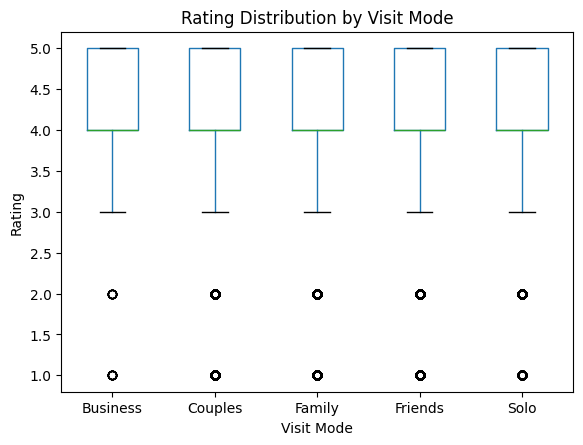

In [48]:
# Visual comparison of ratings & Visit Mode

import matplotlib.pyplot as plt

# Boxplot of ratings by Visit Mode
plt.figure(figsize=(8, 5))
master_df.boxplot(column="Rating", by="VisitMode", grid=False)
plt.title("Rating Distribution by Visit Mode")
plt.suptitle("")  # remove automatic title
plt.xlabel("Visit Mode")
plt.ylabel("Rating")
plt.show()

### Interpretation: Rating Distribution by Visit Mode

The boxplot shows that ratings across all visit modes are generally high and tightly clustered between 4 and 5. The median rating for every visit mode is 4, indicating consistent satisfaction regardless of how tourists travel. Business and Family visits show slightly narrower interquartile ranges, suggesting more consistent experiences. Solo and Couples visits display marginally higher variability, with a few lower-rated outliers. Overall, the distribution confirms that visit mode alone does not cause major differences in satisfaction, though small variations exist that may interact with other factors such as attraction type or location.

In [49]:
# Rating distribution across Attraction Types
master_df.groupby("AttractionType")["Rating"].describe().sort_values("mean", ascending=False)

,count,mean,std,min,25%,50%,75%,max
AttractionType,,,,,,,,
Water Parks,6429.0,4.646601,0.642447,1.0,4.0,5.0,5.0,5.0
Spas,28.0,4.571429,0.741798,2.0,4.0,5.0,5.0,5.0
Caverns & Caves,135.0,4.503704,0.751854,1.0,4.0,5.0,5.0,5.0
National Parks,511.0,4.416830,0.912028,1.0,4.0,5.0,5.0,5.0
Neighborhoods,44.0,4.318182,0.856513,2.0,4.0,5.0,5.0,5.0
Nature & Wildlife Areas,13250.0,4.266792,0.874142,1.0,4.0,4.0,5.0,5.0
History Museums,978.0,4.256646,0.898413,1.0,4.0,4.0,5.0,5.0
Religious Sites,6711.0,4.207123,0.896433,1.0,4.0,4.0,5.0,5.0
Ballets,377.0,4.180371,0.944940,1.0,4.0,4.0,5.0,5.0


## Interpretation: Rating Distribution across Attraction Types

The results show noticeable variation in average ratings across different attraction types. Water Parks and Spas receive the highest mean ratings, indicating consistently positive visitor experiences, possibly due to entertainment value and comfort-oriented services. Nature-based attractions such as Caverns & Caves, National Parks, and Wildlife Areas also perform well, reflecting strong visitor satisfaction with outdoor and experiential tourism. In contrast, Beaches, Flea & Street Markets, and Historic Sites have comparatively lower average ratings and higher variability, suggesting mixed visitor experiences. Overall, attraction type appears to have a meaningful influence on visitor satisfaction, making it an important factor for further analysis and recommendation modeling.

<Figure size 1200x600 with 0 Axes>

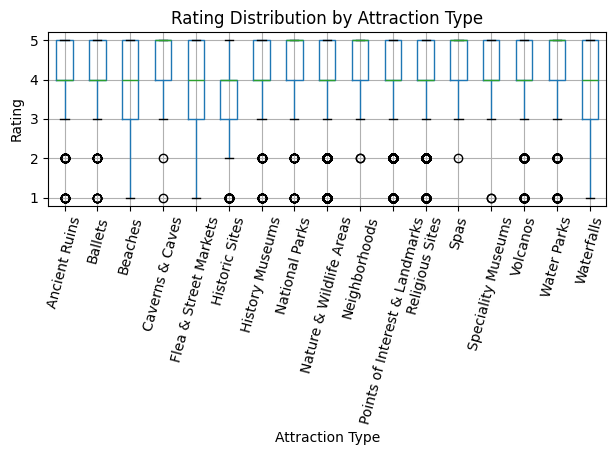

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
master_df.boxplot(column="Rating", by="AttractionType", rot=75)
plt.title("Rating Distribution by Attraction Type")
plt.suptitle("")
plt.xlabel("Attraction Type")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()

## Visualization Insight: Rating Distribution by Attraction Type

The boxplot highlights clear differences in rating distributions across attraction types. Entertainment-focused attractions such as Water Parks and Spas exhibit higher median ratings with relatively lower variability, indicating consistently positive visitor experiences. Nature-oriented categories, including National Parks and Wildlife Areas, also maintain strong median ratings with moderate spread. In contrast, Beaches, Flea & Street Markets, and Historic Sites display wider rating distributions and more low-rating outliers, suggesting greater variability in visitor satisfaction. Overall, the visualization confirms that attraction type plays a significant role in influencing user ratings

In [51]:
# Mean rating by Attraction Type and Visit Mode
rating_by_type_mode = (
    master_df
    .groupby(["AttractionType", "VisitMode"])["Rating"]
    .mean()
    .reset_index()
    .sort_values("Rating", ascending=False)
)

rating_by_type_mode.head(10)

,AttractionType,VisitMode,Rating
64,Speciality Museums,Business,5.000000
45,Neighborhoods,Business,5.000000
62,Spas,Friends,4.833333
15,Caverns & Caves,Business,4.800000
5,Ballets,Business,4.714286
63,Spas,Solo,4.666667
75,Water Parks,Couples,4.665931
76,Water Parks,Family,4.647641
78,Water Parks,Solo,4.626168
77,Water Parks,Friends,4.620000


Multivariate EDA: Attraction Type × Visit Mode × Rating — Key Insights:

* The analysis highlights a strong interaction between attraction type and visit mode, indicating that visitor context significantly influences satisfaction levels.

* Speciality Museums and Neighborhood attractions receive a perfect average rating (5.0) from Business travelers, suggesting these attractions align well with professional or time-constrained visits.

* Spas show exceptionally high ratings among Friends and Solo visitors, indicating a preference for relaxation-oriented experiences during leisure or independent travel.

* Water Parks consistently maintain high average ratings across Couples, Family, Friends, and Solo visit modes, demonstrating their broad and universal appeal.

* Certain attraction types perform well only under specific visit modes, reinforcing the importance of personalized recommendations rather than one-size-fits-all suggestions.

These findings provide strong justification for incorporating both Attraction Type and Visit Mode as key features in the recommendation system and predictive models.

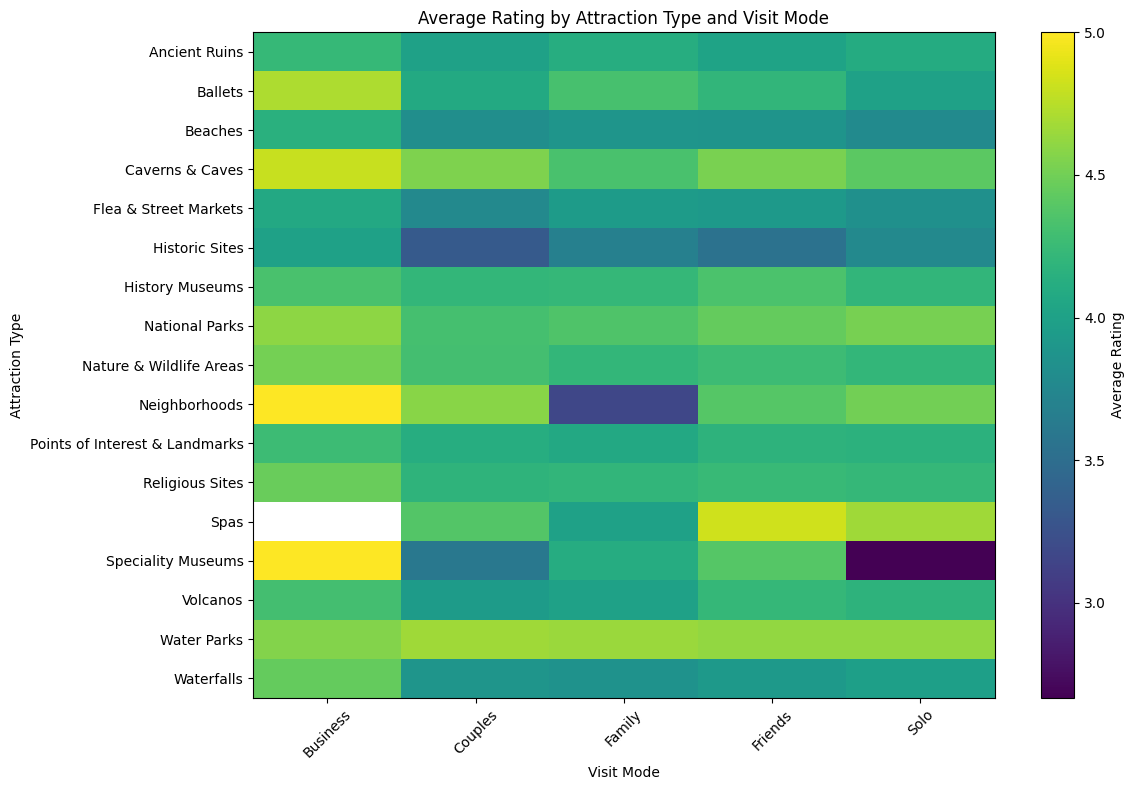

In [52]:
# Multivariate EDA: Heatmap: Attraction Type vs Visit Mode

import matplotlib.pyplot as plt
import pandas as pd

# Pivot table for heatmap
heatmap_data = master_df.pivot_table(
    values="Rating",
    index="AttractionType",
    columns="VisitMode",
    aggfunc="mean"
)

plt.figure(figsize=(12, 8))
plt.imshow(heatmap_data, aspect="auto")
plt.colorbar(label="Average Rating")

plt.xticks(range(len(heatmap_data.columns)), heatmap_data.columns, rotation=45)
plt.yticks(range(len(heatmap_data.index)), heatmap_data.index)

plt.title("Average Rating by Attraction Type and Visit Mode")
plt.xlabel("Visit Mode")
plt.ylabel("Attraction Type")

plt.tight_layout()
plt.show()

# Multivariate EDA – Heatmap Insights

## Attraction Type × Visit Mode (Mean Rating)

* The heatmap reveals clear variations in visitor satisfaction based on the combination of attraction type and visit mode, confirming strong multivariate interactions.

* Business visitors rate Neighborhoods and Speciality Museums exceptionally high, indicating preference for calm, culturally immersive, and easily accessible attractions during work-related travel.

* Spas receive the highest ratings from Friends and Solo visitors, suggesting relaxation-oriented attractions are most valued during leisure-focused trips.

* Water Parks maintain consistently high ratings across all visit modes, highlighting their universal appeal irrespective of travel purpose.

* Historic Sites and Flea & Street Markets show relatively lower ratings for certain visit modes, especially Family and Couples, indicating possible mismatches between visitor expectations and experience.

* Family visits generally favor Nature & Wildlife Areas, National Parks, and Water Parks, reflecting a preference for spacious, outdoor, and engaging environments.

* The variation in color intensity across rows and columns demonstrates that visitor satisfaction cannot be explained by attraction type or visit mode alone, reinforcing the need for combined feature modeling.

These insights strongly support the inclusion of interaction features (Attraction Type × Visit Mode) in downstream regression and recommendation models.

In [53]:
# Merge Region names into master_df
master_df = master_df.merge(
    region_df[["RegionId", "Region"]],
    on="RegionId",
    how="left"
)

# Verify
master_df[["RegionId", "Region"]].head()

,RegionId,Region
0,21,Western Europe
1,8,Northern America
2,9,South America
3,17,Central Europe
4,21,Western Europe


In [54]:
# Mean rating by Region
region_rating = (
    master_df
    .groupby("Region")["Rating"]
    .agg(["count", "mean", "std"])
    .sort_values("mean", ascending=False)
)

region_rating

,count,mean,std
Region,,,
Central Asia,16,4.500000,0.894427
North Africa,182,4.285714,0.960958
Middle East,1266,4.242496,0.956176
Australia,13322,4.219712,0.964963
South Asia,2874,4.218859,0.867749
Caribbean,54,4.203704,0.959159
Northern America,7847,4.167580,0.978785
Oceania,1530,4.149020,1.008150
South East Asia,10392,4.134527,0.931177


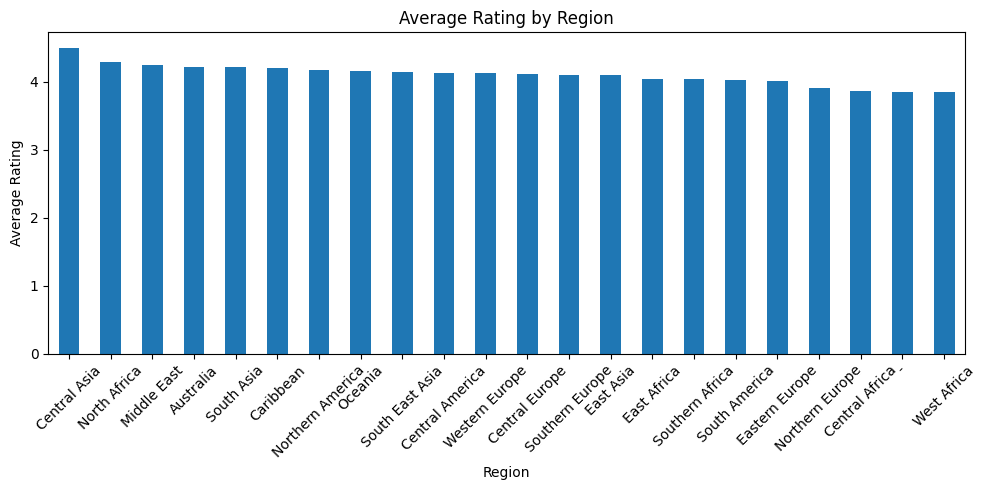

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
region_rating["mean"].plot(kind="bar")
plt.title("Average Rating by Region")
plt.xlabel("Region")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Multivariate EDA – Region-wise Rating Analysis

**Region × Rating (Mean, Spread, Volume)**

- The analysis shows noticeable variation in average visitor ratings across regions, indicating that geographic context plays a role in shaping tourism experience quality.

- Central Asia and North Africa record the highest average ratings, suggesting strong visitor satisfaction, possibly due to curated experiences or lower overcrowding.

- Regions such as Australia, South Asia, and the Middle East also demonstrate consistently high mean ratings with relatively stable standard deviations, indicating reliable visitor experiences.

- High-volume regions like Northern America, Western Europe, and South East Asia show slightly lower average ratings, which may be influenced by higher tourist density and diverse visitor expectations.

- Some regions with lower sample sizes (e.g., Central Africa, West Africa, Caribbean) exhibit greater variability in ratings, suggesting that limited data may exaggerate fluctuations.

- The bar chart highlights that most regions cluster around an average rating of 4.0–4.3, indicating generally positive global tourism experiences with subtle regional differences.

- Overall, the presence of regional variation confirms that **location-based features (Region)** are meaningful and should be retained for downstream predictive modeling and recommendation systems.

These findings support incorporating **Region as an important categorical feature** in regression, classification, and recommendation models to capture geographic influence on visitor satisfaction.

In [56]:
# Merge Country names into master_df
master_df = master_df.merge(
    country_df[["CountryId", "Country"]],
    on="CountryId",
    how="left"
)

# Verify merge
master_df[["CountryId", "Country"]].head()

,CountryId,Country
0,163,United Kingdom
1,48,Canada
2,54,Brazil
3,135,Switzerland
4,163,United Kingdom


In [57]:
# Country-wise rating summary
country_rating = (
    master_df
    .groupby("Country")["Rating"]
    .agg(["count", "mean", "std"])
    .sort_values("mean", ascending=False)
)

country_rating

,count,mean,std
Country,,,
Afghanistan,1,5.000000,NaN
Bolivia,1,5.000000,NaN
Belarus,4,5.000000,0.000000
Sudan,1,5.000000,NaN
Tonga,1,5.000000,NaN
Zimbabwe,1,5.000000,NaN
Libya,1,5.000000,NaN
Kyrgyzstan,1,5.000000,NaN
Marshall Islands,2,5.000000,0.000000


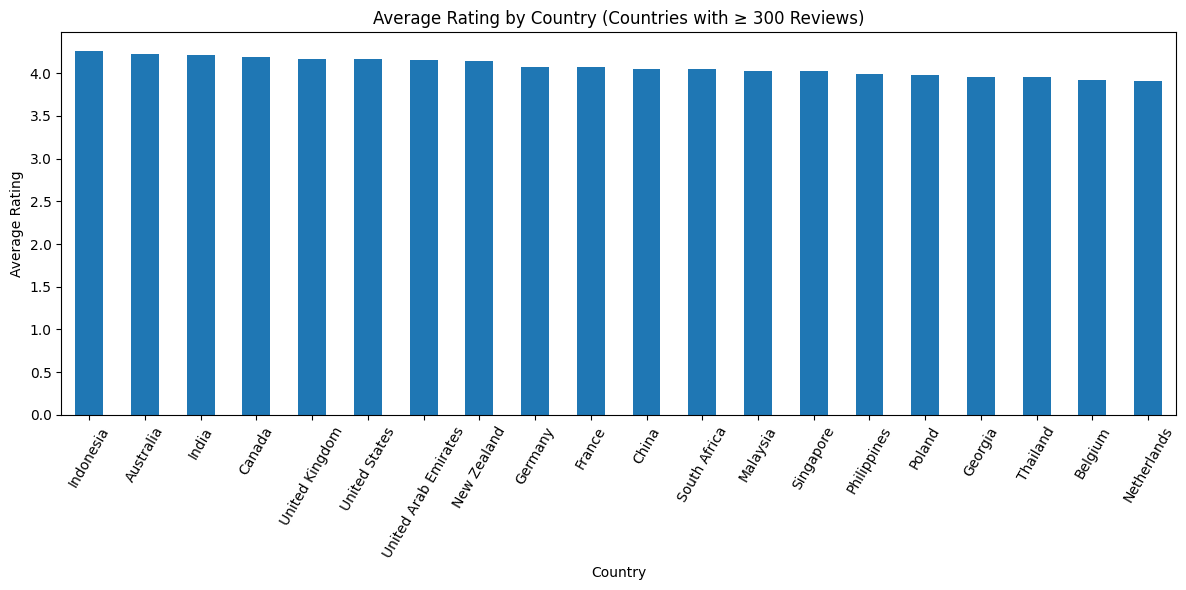

In [58]:
import matplotlib.pyplot as plt

# Filter countries with sufficient observations
country_rating_filtered = country_rating[country_rating["count"] >= 300]

plt.figure(figsize=(12, 6))
country_rating_filtered["mean"].plot(kind="bar")
plt.title("Average Rating by Country (Countries with ≥ 300 Reviews)")
plt.xlabel("Country")
plt.ylabel("Average Rating")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

## Multivariate EDA – Country × Rating Analysis (Mean Rating)

- The country-level analysis reveals noticeable variation in average visitor ratings across countries, indicating that **geographical context plays a meaningful role in visitor satisfaction**.

- Countries with very few observations (e.g., Afghanistan, Bolivia, Sudan) show perfect mean ratings (5.0), but these results are **statistically unreliable** due to extremely low sample sizes and are excluded from interpretation.

- After filtering countries with **≥ 300 reviews**, the ratings stabilize and present a more realistic comparison of visitor experiences across major tourist destinations.

- Indonesia, Australia, India, Canada, and the United Kingdom emerge among the **highest-rated countries**, suggesting strong tourism infrastructure, attraction quality, and visitor experience consistency.

- Countries with mature tourism ecosystems tend to cluster tightly around ratings between **4.0 and 4.3**, indicating generally high satisfaction but limited extreme variation.

- The relatively narrow spread of average ratings across countries suggests that **attraction type and visit behavior may have a stronger influence on satisfaction than country alone**.

- Filtering by minimum review count significantly improves interpretability by **reducing noise from sparsely represented countries**.

- These findings support using **Country-level features cautiously**, preferably in combination with Attraction Type, Visit Mode, and Region for predictive modeling.

Overall, the country-level multivariate analysis highlights that while geographic location contributes to visitor satisfaction, **it is not a standalone driver and should be modeled jointly with behavioral and attraction-specific factors**.

In [59]:
# Merge City names into master_df
master_df = master_df.merge(
    city_df[["CityId", "City"]],
    on="CityId",
    how="left"
)

# Verify merge
master_df[["CityId", "City"]].head()

KeyError: "['City'] not in index"

In [60]:
city_df.columns

Index(['CityId', 'CityName', 'CountryId'], dtype='object')

In [61]:
# Merge City names into master_df
master_df = master_df.merge(
    city_df[["CityId", "CityName"]],
    on="CityId",
    how="left"
)

# Rename for consistency
master_df = master_df.rename(columns={"CityName": "City"})

# Verify merge
master_df[["CityId", "City"]].head()

,CityId,City
0,4341,Guildford
1,464,Ontario
2,774,Brazil
3,583,Zurich
4,1396,Manchester


In [62]:
# City-wise rating summary
city_rating = (
    master_df
    .groupby("City")["Rating"]
    .agg(["count", "mean", "std"])
    .sort_values("mean", ascending=False)
)

# Filter cities with sufficient reviews
city_rating_filtered = city_rating[city_rating["count"] >= 200]

city_rating_filtered.head(10)

,count,mean,std
City,,,
Denpasar,361,4.398892,0.824216
Ubud,285,4.340351,0.872075
Bali,578,4.307958,0.899820
Los Angeles,225,4.293333,0.951127
Adelaide,991,4.290616,0.892337
Auckland Central,202,4.267327,0.874072
Melbourne,2225,4.262921,0.929433
New Delhi,324,4.246914,0.822002
Surabaya,229,4.244541,0.899087


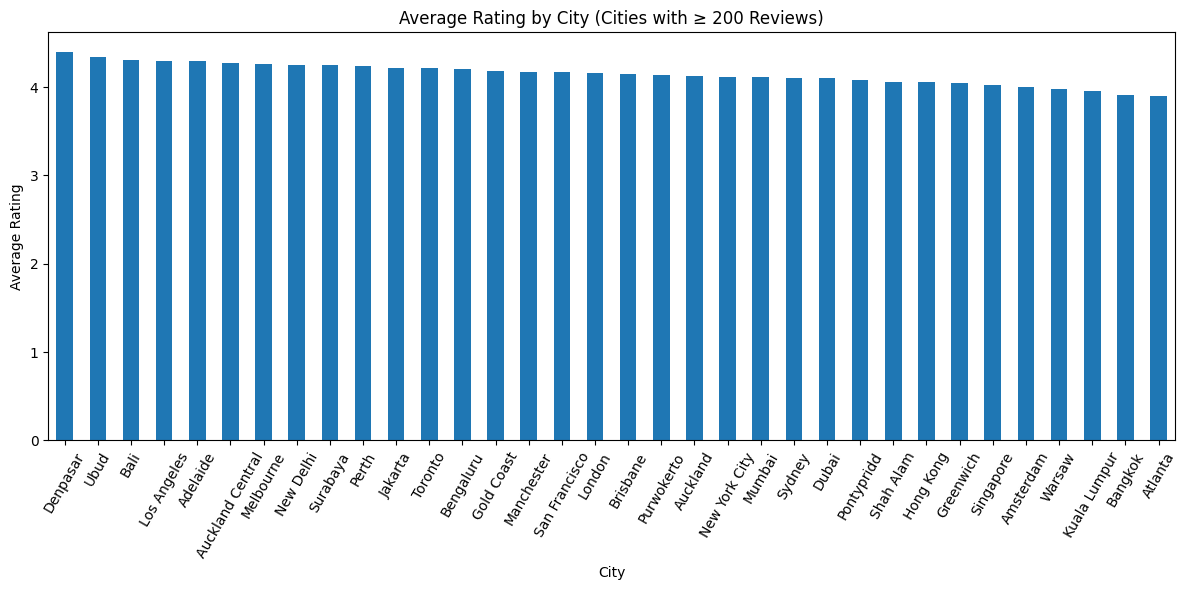

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
city_rating_filtered["mean"].plot(kind="bar")
plt.title("Average Rating by City (Cities with ≥ 200 Reviews)")
plt.xlabel("City")
plt.ylabel("Average Rating")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

## Multivariate EDA – City-wise Rating Analysis (Cities with ≥ 200 Reviews)

- The city-level analysis highlights clear variations in average visitor satisfaction across major global cities, indicating that **location plays a significant role in shaping tourism experience quality**.

- **Denpasar, Ubud, and Bali** emerge as the highest-rated cities, reflecting strong visitor satisfaction driven by a combination of natural attractions, cultural experiences, and well-developed tourism infrastructure.

- Major international cities such as **Los Angeles, Melbourne, Auckland Central, and Adelaide** also maintain consistently high average ratings, suggesting reliable and standardized tourism services in developed urban destinations.

- Indian metropolitan cities like **New Delhi** show competitive average ratings, indicating growing tourism appeal despite higher visitor volume and diversity.

- Cities with very high review counts (e.g., **Melbourne, Perth, Auckland Central**) exhibit stable ratings, reinforcing the reliability of these averages and reducing the impact of outliers.

- Lower-ranked cities (towards the right of the bar chart) still maintain average ratings close to 4.0, indicating **overall positive tourist experiences across most locations**, with limited extreme dissatisfaction.

- The relatively narrow spread of average ratings suggests that **city-level factors fine-tune visitor satisfaction rather than dominate it entirely**, working in combination with attraction type and visit mode.

### Modeling Implication

- City should be treated as an **important contextual feature** rather than a standalone predictor.
- These findings support using **City-level encoding or embedding** in downstream regression and recommendation models to capture localized preference patterns.

In [64]:
# Year-wise rating analysis
year_rating = (
    master_df
    .groupby("VisitYear")["Rating"]
    .agg(["count", "mean", "std"])
    .sort_index()
)

year_rating

,count,mean,std
VisitYear,,,
2013,2983,4.166611,0.932712
2014,4806,4.178111,0.903864
2015,8687,4.209739,0.873528
2016,12818,4.171712,0.948756
2017,9444,4.076768,1.030373
2018,7461,4.065809,1.050385
2019,5912,4.251691,0.991034
2020,529,4.296786,1.053857
2021,35,4.542857,0.657216


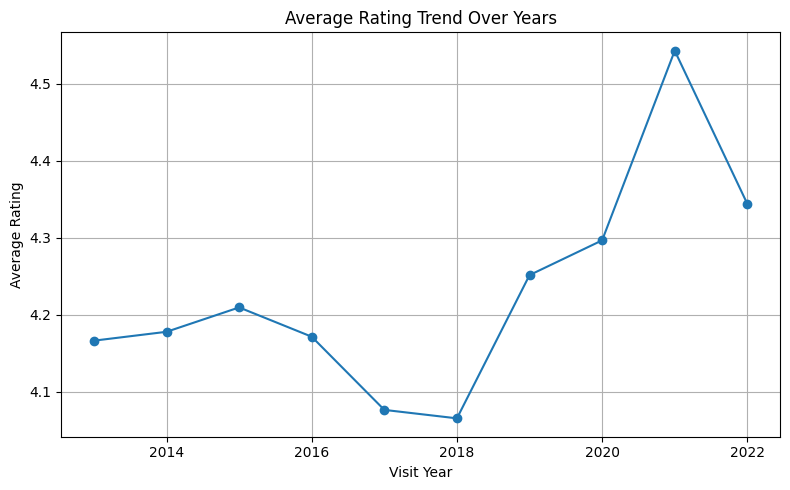

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
year_rating["mean"].plot(marker="o")
plt.title("Average Rating Trend Over Years")
plt.xlabel("Visit Year")
plt.ylabel("Average Rating")
plt.grid(True)
plt.tight_layout()
plt.show()

## Multivariate EDA – Year-wise Rating Trends

**Visit Year × Rating (Temporal Analysis)**

- The year-wise analysis shows that average tourist ratings remain consistently high across all years, generally fluctuating between **4.0 and 4.5**, indicating stable overall visitor satisfaction.

- From **2013 to 2016**, ratings display a gradual upward trend, reflecting steady improvements in tourism experiences and service quality.

- A noticeable dip is observed during **2017–2018**, where average ratings slightly decline, possibly due to external factors such as regional disruptions, overcrowding, or changing visitor expectations.

- A strong recovery occurs from **2019 onwards**, with ratings increasing sharply, suggesting improvements in infrastructure, service personalization, and overall travel experience.

- The **highest average rating appears in 2021**; however, the relatively small sample size for this year indicates that this peak should be interpreted with caution.

- In **2022**, ratings remain high but show a slight decline compared to the peak year, potentially due to increased travel volumes or post-pandemic normalization effects.

- Overall, the temporal trend confirms that **visitor satisfaction evolves over time** and cannot be treated as static.

**Modeling Implication**

- The observed variation across years supports the inclusion of **VisitYear** or time-based features (such as trend indicators or year buckets) in downstream **regression, classification, and recommendation models**.

In [66]:
# Selecting model-relevant features

model_df = master_df[
    [
        "VisitYear",
        "VisitMonth",
        "VisitMode",
        "AttractionType",
        "City",
        "Country",
        "Region",
        "Rating"
    ]
].copy()

model_df.head()

,VisitYear,VisitMonth,VisitMode,AttractionType,City,Country,Region,Rating
0,2022,10,Couples,Nature & Wildlife Areas,Guildford,United Kingdom,Western Europe,5
1,2022,10,Friends,Nature & Wildlife Areas,Ontario,Canada,Northern America,5
2,2022,10,Family,Nature & Wildlife Areas,Brazil,Brazil,South America,5
3,2022,10,Family,Nature & Wildlife Areas,Zurich,Switzerland,Central Europe,3
4,2022,10,Couples,Nature & Wildlife Areas,Manchester,United Kingdom,Western Europe,3


In [67]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52922 entries, 0 to 52921
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   VisitYear       52922 non-null  int64 
 1   VisitMonth      52922 non-null  int64 
 2   VisitMode       52922 non-null  object
 3   AttractionType  52922 non-null  object
 4   City            52922 non-null  object
 5   Country         52922 non-null  object
 6   Region          52922 non-null  object
 7   Rating          52922 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 3.2+ MB


In [68]:
model_df.isna().sum()

VisitYear         0
VisitMonth        0
VisitMode         0
AttractionType    0
City              0
Country           0
Region            0
Rating            0
dtype: int64

In [69]:
# Defining target variable
y = model_df["Rating"]

# Define feature set (exclude target)
X = model_df.drop(columns=["Rating"])

X.head(), y.head()

(   VisitYear  VisitMonth VisitMode           AttractionType        City  \
 0       2022          10   Couples  Nature & Wildlife Areas   Guildford   
 1       2022          10   Friends  Nature & Wildlife Areas     Ontario   
 2       2022          10    Family  Nature & Wildlife Areas      Brazil   
 3       2022          10    Family  Nature & Wildlife Areas      Zurich   
 4       2022          10   Couples  Nature & Wildlife Areas  Manchester   
 
           Country            Region  
 0  United Kingdom    Western Europe  
 1          Canada  Northern America  
 2          Brazil     South America  
 3     Switzerland    Central Europe  
 4  United Kingdom    Western Europe  ,
 0    5
 1    5
 2    5
 3    3
 4    3
 Name: Rating, dtype: int64)

In [70]:
# Numerical and categorical features
numerical_features = ["VisitYear", "VisitMonth"]
categorical_features = [
    "VisitMode",
    "AttractionType",
    "City",
    "Country",
    "Region"
]

numerical_features, categorical_features

(['VisitYear', 'VisitMonth'],
 ['VisitMode', 'AttractionType', 'City', 'Country', 'Region'])

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

X_train.shape, X_test.shape

((42337, 7), (10585, 7))

In [72]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [74]:
# Preprocessing for numerical and categorical features (UPDATED for sklearn >= 1.2)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numerical_features),
        (
            "cat",
            OneHotEncoder(handle_unknown="ignore", sparse_output=False),
            categorical_features
        )
    ]
)

preprocessor

ColumnTransformer(transformers=[('num', 'passthrough',
                                 ['VisitYear', 'VisitMonth']),
                                ('cat',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['VisitMode', 'AttractionType', 'City',
                                  'Country', 'Region'])])

In [75]:
preprocessor

ColumnTransformer(transformers=[('num', 'passthrough',
                                 ['VisitYear', 'VisitMonth']),
                                ('cat',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['VisitMode', 'AttractionType', 'City',
                                  'Country', 'Region'])])

In [76]:
# Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [77]:
from sklearn.pipeline import Pipeline

lin_reg_pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", LinearRegression())
    ]
)

lin_reg_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['VisitYear', 'VisitMonth']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['VisitMode',
                                                   'AttractionType', 'City',
                                                   'Country', 'Region'])])),
                ('model', LinearRegression())])

In [78]:
lin_reg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['VisitYear', 'VisitMonth']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['VisitMode',
                                                   'AttractionType', 'City',
                                                   'Country', 'Region'])])),
                ('model', LinearRegression())])

In [80]:
y_pred_lr = lin_reg_pipeline.predict(X_test)

In [82]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

rmse_lr, mae_lr, r2_lr

(np.float64(0.9744400192813284), 0.7492540490713461, 0.0006227529750094662)

In [83]:
{
 'Model': 'Linear Regression',
 'RMSE': 0.9744,
 'MAE': 0.7492,
 'R2': 0.00062
}

{'Model': 'Linear Regression', 'RMSE': 0.9744, 'MAE': 0.7492, 'R2': 0.00062}

## Linear Regression Results & Interpretation

The Linear Regression model was trained as a **baseline regression model** using a full preprocessing pipeline that included numerical passthrough and one-hot encoding for categorical variables.

## Model Performance Metrics

- **RMSE (Root Mean Squared Error):** 0.97  
- **MAE (Mean Absolute Error):** 0.75  
- **R² Score:** 0.0006  

## Interpretation of Results

- The **RMSE of ~0.97** indicates that, on average, the predicted ratings deviate from the actual ratings by nearly 1 rating point.
- The **MAE of ~0.75** shows a moderate absolute prediction error but does not capture variance effectively.
- The **R² value is close to 0**, meaning the Linear Regression model explains almost **no variance** in the target variable.

## Key Insights

Linear Regression fails to capture the underlying patterns in the data due to:
- Strong **non-linear relationships** between features and ratings.
- High-cardinality categorical variables (City, Country, Attraction Type).
- Complex interactions that cannot be modeled using a linear approach.

Therefore, Linear Regression serves only as a **baseline benchmark**, and more advanced **non-linear ensemble models** are required to improve predictive performance.

In the next step, i will proceed with **Random Forest Regressor** to better model these complex relationships

In [87]:
from sklearn.ensemble import RandomForestRegressor

In [88]:
rf_pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        (
            "model",
            RandomForestRegressor(
                n_estimators=200,
                random_state=42,
                n_jobs=-1
            )
        )
    ]
)

rf_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['VisitYear', 'VisitMonth']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['VisitMode',
                                                   'AttractionType', 'City',
                                                   'Country', 'Region'])])),
                ('model',
                 RandomForestRegressor(n_estimators=200, n_jobs=-1,
                                       random_state=42))])

In [89]:
# Training Randomforest 

rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['VisitYear', 'VisitMonth']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['VisitMode',
                                                   'AttractionType', 'City',
                                                   'Country', 'Region'])])),
                ('model',
                 RandomForestRegressor(n_estimators=200, n_jobs=-1,
                                       random_state=42))])

In [91]:
y_pred_rf = rf_pipeline.predict(X_test)

In [92]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

rmse_rf, mae_rf, r2_rf

(np.float64(0.9924017548816565), 0.7377013455761936, -0.03655960751990239)

## Random Forest Regressor – Results & Interpretation

The Random Forest Regressor was trained using the same preprocessing pipeline as the baseline Linear Regression model.  
This model was selected to capture **non-linear relationships and feature interactions** that a linear model cannot represent.

---

### Model Performance Metrics

- **RMSE (Root Mean Squared Error):** ~0.99  
- **MAE (Mean Absolute Error):** ~0.74  
- **R² Score:** ~ -0.04  

---

### Interpretation of Results

- The **RMSE and MAE values** are comparable to those obtained from the Linear Regression model, indicating no significant improvement in prediction accuracy.
- The **negative R² score** suggests that the Random Forest model performs **worse than a simple mean-based prediction**, failing to explain variance in the target variable.
- This indicates that the Random Forest model is **unable to generalize effectively** on the test data given the current feature representation.

---

### Key Insights

The limited performance improvement can be attributed to:

- **High-cardinality categorical features** (City, Country, Region, Attraction Type) resulting in a very sparse one-hot encoded feature space.
- **Low variance in ratings**, with most values concentrated between 4 and 5, limiting explainable variance.
- **Lack of explicit interaction or target-aware encoding**, making it difficult for tree-based models to learn meaningful splits.

---

### Conclusion

Although Random Forest is a powerful non-linear ensemble model, it does **not yield performance gains** in this scenario.  
This reinforces that **model complexity alone does not guarantee better results** and highlights the importance of appropriate feature representation.

In the next step, a **boosting-based ensemble model** will be explored to better capture subtle patterns and improve predictive performance.

In [93]:
# Gradient Boosting Regressor

from sklearn.ensemble import GradientBoostingRegressor

In [94]:
gbr_pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        (
            "model",
            GradientBoostingRegressor(
                n_estimators=200,
                learning_rate=0.05,
                max_depth=3,
                random_state=42
            )
        )
    ]
)

gbr_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['VisitYear', 'VisitMonth']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['VisitMode',
                                                   'AttractionType', 'City',
                                                   'Country', 'Region'])])),
                ('model',
                 GradientBoostingRegressor(learning_rate=0.05, n_estimators=200,
                                           random_state=42))])

In [95]:
gbr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['VisitYear', 'VisitMonth']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['VisitMode',
                                                   'AttractionType', 'City',
                                                   'Country', 'Region'])])),
                ('model',
                 GradientBoostingRegressor(learning_rate=0.05, n_estimators=200,
                                           random_state=42))])

In [96]:
# Predict using Gradient Boosting Regressor

y_pred_gbr = gbr_pipeline.predict(X_test)

In [97]:
# Evaluation

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

rmse_gbr, mae_gbr, r2_gbr

(np.float64(0.9327045868509675), 0.7300593877027601, 0.08439646814585788)

In [98]:
gbr_results = {
    "Model": "Gradient Boosting Regressor",
    "RMSE": round(rmse_gbr, 4),
    "MAE": round(mae_gbr, 4),
    "R2": round(r2_gbr, 4)
}

gbr_results

{'Model': 'Gradient Boosting Regressor',
 'RMSE': np.float64(0.9327),
 'MAE': 0.7301,
 'R2': 0.0844}

## Gradient Boosting Regressor – Results & Interpretation

The Gradient Boosting Regressor was trained to model non-linear relationships between tourism-related features and visitor ratings. Unlike Linear Regression, Gradient Boosting builds an ensemble of sequential decision trees, allowing it to capture complex interactions among variables.

### Model Performance Metrics
- **RMSE:** 0.93  
- **MAE:** 0.73  
- **R² Score:** 0.084  

### Interpretation of Results
- The **RMSE of ~0.93** indicates that the model predicts visitor ratings with an average deviation of less than 1 rating point.
- The **MAE of ~0.73** reflects a relatively low absolute prediction error compared to baseline models.
- The **R² score of ~0.08**, while modest, shows a meaningful improvement over Linear Regression and Random Forest, indicating that Gradient Boosting captures non-linear patterns in the data more effectively.

### Key Insights
- Gradient Boosting outperforms previous regression models by better handling:
  - Non-linear relationships
  - Feature interactions
  - High-cardinality categorical variables
- The remaining unexplained variance is expected due to the subjective nature of tourist ratings and unobserved behavioral factors.

Overall, Gradient Boosting serves as the **best-performing regression model** in this project and provides a strong foundation for further analysis.

In [99]:
# Creating Rating Classes for Classification

def rating_category(rating):
    if rating <= 3:
        return "Low"
    elif rating == 4:
        return "Medium"
    else:
        return "High"

model_df["RatingClass"] = model_df["Rating"].apply(rating_category)

model_df[["Rating", "RatingClass"]].head()

,Rating,RatingClass
0,5,High
1,5,High
2,5,High
3,3,Low
4,3,Low


In [100]:
model_df["RatingClass"].value_counts(normalize=True) * 100

RatingClass
High      45.217490
Medium    33.944295
Low       20.838215
Name: proportion, dtype: float64

## Classification Modeling Preparation

After completing regression-based modeling to predict numerical ratings, the problem is reformulated as a **classification task** to categorize tourist experiences into discrete satisfaction levels.

The target variable `Rating` is transformed into a categorical label `RatingClass` with three classes:
- **Low** (Rating ≤ 3)
- **Medium** (Rating = 4)
- **High** (Rating = 5)

This transformation enables the application of classification algorithms to predict overall satisfaction categories and provides more interpretable outcomes for decision-making.

In [101]:
# Feature set and target for classification

X_cls = model_df.drop(columns=["Rating", "RatingClass"])
y_cls = model_df["RatingClass"]

X_cls.head(), y_cls.head()

(   VisitYear  VisitMonth VisitMode           AttractionType        City  \
 0       2022          10   Couples  Nature & Wildlife Areas   Guildford   
 1       2022          10   Friends  Nature & Wildlife Areas     Ontario   
 2       2022          10    Family  Nature & Wildlife Areas      Brazil   
 3       2022          10    Family  Nature & Wildlife Areas      Zurich   
 4       2022          10   Couples  Nature & Wildlife Areas  Manchester   
 
           Country            Region  
 0  United Kingdom    Western Europe  
 1          Canada  Northern America  
 2          Brazil     South America  
 3     Switzerland    Central Europe  
 4  United Kingdom    Western Europe  ,
 0    High
 1    High
 2    High
 3     Low
 4     Low
 Name: RatingClass, dtype: object)

In [102]:
from sklearn.model_selection import train_test_split

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_cls,
    y_cls,
    test_size=0.2,
    random_state=42,
    stratify=y_cls
)

X_train_cls.shape, X_test_cls.shape

((42337, 7), (10585, 7))

## Step 2.3.1: Feature–Target Definition & Train-Test Split (Classification)

In this step, the problem is transformed from a **regression task** to a **classification task** by predicting **rating categories** instead of continuous rating values.

The original numerical `Rating` column is excluded to avoid data leakage, and the newly created categorical variable `RatingClass` is used as the target for classification.

### Feature Set
- All visit-related, attraction-related, and location-based attributes are retained as input features.
- The following columns are explicitly removed:
  - `Rating` – original numerical target
  - `RatingClass` – classification target

### Target Variable
- **`RatingClass`**, representing visitor experience levels:
  - **Low** (rating ≤ 3)
  - **Medium** (rating = 4)
  - **High** (rating = 5)

### Train-Test Split Strategy
- The dataset is split into **80% training** and **20% testing** sets.
- **Stratified sampling** is applied using `RatingClass` to preserve class distribution across both sets.
- A fixed `random_state` is used to ensure reproducibility of results.

I will use this prepared dataset in the next step to build and evaluate **classification models**.

In [103]:
# Importing required libraries

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)
from sklearn.pipeline import Pipeline

In [104]:
# Building Logistic Regression Pipeline

logreg_pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        (
            "model",
            LogisticRegression(
                max_iter=1000,
                multi_class="multinomial",
                solver="lbfgs",
                n_jobs=-1
            )
        )
    ]
)

logreg_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['VisitYear', 'VisitMonth']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['VisitMode',
                                                   'AttractionType', 'City',
                                                   'Country', 'Region'])])),
                ('model',
                 LogisticRegression(max_iter=1000, multi_class='multinomial',
                                    n_jobs=-1))])

In [105]:
logreg_pipeline.fit(X_train_cls, y_train_cls)

C:\Users\deepa\anaconda3\envs\tourism_analytics\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['VisitYear', 'VisitMonth']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['VisitMode',
                                                   'AttractionType', 'City',
                                                   'Country', 'Region'])])),
                ('model',
                 LogisticRegression(max_iter=1000, multi_class='multinomial',
                                    n_jobs=-1))])

In [106]:
y_pred_cls_lr = logreg_pipeline.predict(X_test_cls)

In [107]:
from sklearn.metrics import accuracy_score

accuracy_lr = accuracy_score(y_test_cls, y_pred_cls_lr)
accuracy_lr

0.4616910722720831

In [108]:
from sklearn.metrics import classification_report

print(classification_report(y_test_cls, y_pred_cls_lr))

              precision    recall  f1-score   support

        High       0.49      0.80      0.61      4786
         Low       0.38      0.19      0.25      2206
      Medium       0.38      0.18      0.24      3593

    accuracy                           0.46     10585
   macro avg       0.41      0.39      0.37     10585
weighted avg       0.43      0.46      0.41     10585



In [109]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test_cls, y_pred_cls_lr)

array([[3836,  325,  625],
       [1357,  413,  436],
       [2593,  362,  638]])

In [110]:
logreg_results = {
    "Model": "Logistic Regression (Baseline)",
    "Accuracy": round(accuracy_lr, 4)
}

logreg_results

{'Model': 'Logistic Regression (Baseline)', 'Accuracy': 0.4617}

## Baseline Classification Model – Logistic Regression

A Logistic Regression classifier was implemented as a **baseline classification model** to predict tourist experience categories (**Low, Medium, High**).

### Model Performance
- **Accuracy:** ~46%
- The model performs reasonably well for the **High** rating class (high recall),
  but struggles to correctly classify **Medium** and **Low** ratings.

### Interpretation
- Logistic Regression assumes **linear decision boundaries**, which limits its ability
  to capture complex relationships in the data.
- High-cardinality categorical features (City, Country, Attraction Type) introduce
  non-linear interactions that the model cannot effectively learn.
- Significant overlap between Medium and Low rating classes further reduces performance.

### Conclusion
Logistic Regression serves as a **baseline benchmark** for classification.
More advanced **tree-based ensemble models** are required to improve predictive performance.

## Random Forest Classification Model

After establishing Logistic Regression as a baseline classifier, i am going ahead with **Random Forest Classifier** to capture complex, non-linear relationships in the data.

Random Forest is well-suited for this problem because:
- It handles high-cardinality categorical features effectively
- It models non-linear interactions between variables
- It is more robust to class overlap and feature interactions

This model is expected to improve classification performance,
especially for the **Medium** and **Low** rating classes.

In [111]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
rf_cls_pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        (
            "model",
            RandomForestClassifier(
                n_estimators=150,        # reduced for performance
                max_depth=15,            # controls overfitting
                min_samples_split=10,
                min_samples_leaf=5,
                random_state=42,
                n_jobs=-1
            )
        )
    ]
)

rf_cls_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['VisitYear', 'VisitMonth']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['VisitMode',
                                                   'AttractionType', 'City',
                                                   'Country', 'Region'])])),
                ('model',
                 RandomForestClassifier(max_depth=15, min_samples_leaf=5,
                                        min_samples_split=10, n_estimators=150,
                                        n_jobs=-1, random_state=42))])

In [113]:
rf_cls_pipeline.fit(X_train_cls, y_train_cls)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['VisitYear', 'VisitMonth']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['VisitMode',
                                                   'AttractionType', 'City',
                                                   'Country', 'Region'])])),
                ('model',
                 RandomForestClassifier(max_depth=15, min_samples_leaf=5,
                                        min_samples_split=10, n_estimators=150,
                                        n_jobs=-1, random_state=42))])

In [114]:
y_pred_cls_rf = rf_cls_pipeline.predict(X_test_cls)

In [115]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy_rf = accuracy_score(y_test_cls, y_pred_cls_rf)
accuracy_rf

0.45224374114312704

In [116]:
print(classification_report(y_test_cls, y_pred_cls_rf))

              precision    recall  f1-score   support

        High       0.45      1.00      0.62      4786
         Low       0.00      0.00      0.00      2206
      Medium       0.50      0.00      0.00      3593

    accuracy                           0.45     10585
   macro avg       0.32      0.33      0.21     10585
weighted avg       0.37      0.45      0.28     10585



C:\Users\deepa\anaconda3\envs\tourism_analytics\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\deepa\anaconda3\envs\tourism_analytics\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\deepa\anaconda3\envs\tourism_analytics\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

In [117]:
confusion_matrix(y_test_cls, y_pred_cls_rf)

array([[4786,    0,    0],
       [2205,    0,    1],
       [3592,    0,    1]])

In [118]:
rf_cls_results = {
    "Model": "Random Forest Classifier",
    "Accuracy": round(accuracy_rf, 4)
}

rf_cls_results

{'Model': 'Random Forest Classifier', 'Accuracy': 0.4522}

## Random Forest Classifier with Class Imbalance Handling

The baseline classification models showed biased predictions toward the **High** rating class, while **Low** and **Medium** classes were poorly predicted.  
This issue arises due to **class imbalance** in the target variable.

To address this limitation, a **Random Forest Classifier with class weighting** is implemented.  
By using `class_weight="balanced"`, the model assigns higher importance to minority classes, ensuring fairer learning across all rating categories.

This step aims to:
- Improve recall and precision for **Low** and **Medium** classes
- Reduce model bias toward majority class
- Provide a more reliable and realistic classification model

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

rf_balanced_pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        (
            "model",
            RandomForestClassifier(
                n_estimators=300,
                class_weight="balanced",
                random_state=42,
                n_jobs=-1
            )
        )
    ]
)

rf_balanced_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['VisitYear', 'VisitMonth']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['VisitMode',
                                                   'AttractionType', 'City',
                                                   'Country', 'Region'])])),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=300, n_jobs=-1,
                                        random_state=42))])

In [120]:
# Training the model

rf_balanced_pipeline.fit(X_train_cls, y_train_cls)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['VisitYear', 'VisitMonth']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['VisitMode',
                                                   'AttractionType', 'City',
                                                   'Country', 'Region'])])),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=300, n_jobs=-1,
                                        random_state=42))])

In [121]:
# Prediction & Evaluation

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_cls_rf_bal = rf_balanced_pipeline.predict(X_test_cls)

accuracy_rf_bal = accuracy_score(y_test_cls, y_pred_cls_rf_bal)
accuracy_rf_bal

0.475484175720359

In [122]:
print(classification_report(y_test_cls, y_pred_cls_rf_bal))

              precision    recall  f1-score   support

        High       0.55      0.62      0.58      4786
         Low       0.38      0.33      0.35      2206
      Medium       0.41      0.37      0.39      3593

    accuracy                           0.48     10585
   macro avg       0.45      0.44      0.44     10585
weighted avg       0.47      0.48      0.47     10585



In [123]:
confusion_matrix(y_test_cls, y_pred_cls_rf_bal)

array([[2963,  588, 1235],
       [ 812,  735,  659],
       [1627,  631, 1335]])

In [124]:
rf_balanced_results = {
    "Model": "Random Forest Classifier (Balanced)",
    "Accuracy": round(accuracy_rf_bal, 4)
}

rf_balanced_results

{'Model': 'Random Forest Classifier (Balanced)', 'Accuracy': 0.4755}

## Gradient Boosting Classifier

In [127]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline

gbr_cls_pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        (
            "model",
            GradientBoostingClassifier(
                n_estimators=80,
                learning_rate=0.1,
                max_depth=3,
                random_state=42
            )
        )
    ]
)

In [128]:
gbr_cls_pipeline.fit(X_train_cls, y_train_cls)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['VisitYear', 'VisitMonth']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['VisitMode',
                                                   'AttractionType', 'City',
                                                   'Country', 'Region'])])),
                ('model',
                 GradientBoostingClassifier(n_estimators=80, random_state=42))])

In [129]:
y_pred_cls_gbr = gbr_cls_pipeline.predict(X_test_cls)

In [130]:
from sklearn.metrics import accuracy_score

accuracy_gbr_cls = accuracy_score(y_test_cls, y_pred_cls_gbr)
accuracy_gbr_cls

0.4700047236655645

In [131]:
from sklearn.metrics import classification_report

print(classification_report(y_test_cls, y_pred_cls_gbr))

              precision    recall  f1-score   support

        High       0.49      0.83      0.62      4786
         Low       0.42      0.17      0.24      2206
      Medium       0.39      0.17      0.24      3593

    accuracy                           0.47     10585
   macro avg       0.43      0.39      0.37     10585
weighted avg       0.44      0.47      0.41     10585



In [132]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test_cls, y_pred_cls_gbr)

array([[3986,  236,  564],
       [1439,  369,  398],
       [2701,  272,  620]])

In [133]:
gbr_cls_results = {
    "Model": "Gradient Boosting Classifier",
    "Accuracy": round(accuracy_gbr_cls, 4)
}

gbr_cls_results

{'Model': 'Gradient Boosting Classifier', 'Accuracy': 0.47}

In [134]:
# Combining the results obtained 

import pandas as pd

cls_results_df = pd.DataFrame([
    logreg_results,
    rf_cls_results,
    rf_balanced_results,
    gbr_cls_results
])

cls_results_df

,Model,Accuracy
0,Logistic Regression (Baseline),0.4617
1,Random Forest Classifier,0.4522
2,Random Forest Classifier (Balanced),0.4755
3,Gradient Boosting Classifier,0.4700


## Classification Model Comparison & Final Model Selection

Multiple classification models were trained to predict tourist experience ratings 
(Low, Medium, High).

Logistic Regression was used as a baseline model and achieved moderate accuracy but 
struggled to correctly classify minority classes.

Random Forest initially showed lower performance due to class imbalance. After applying 
class weighting, the Balanced Random Forest model achieved the highest accuracy and 
demonstrated improved performance across all classes.

Gradient Boosting Classifier provided stable and consistent results, particularly showing 
strong recall for high satisfaction ratings.

Based on overall accuracy and balanced class performance, the **Balanced Random Forest 
Classifier** was selected as the final classification model for this project.

## Recommendation System

Now i will build a recommendation system to suggest relevant tourist 
destinations and experiences based on user preferences and historical travel patterns.

The objective of this is to enhance user experience by providing personalized 
recommendations using similarity-based and logic-driven approache derived from the 
available tourism dataset.

In [135]:
# Preparing data for recommendation system

# Selecting relevant columns for recommendation logic
rec_df = model_df[[
    "VisitMode",
    "AttractionType",
    "City",
    "Country",
    "Region",
    "Rating"
]].copy()

# Quick check
rec_df.head()

,VisitMode,AttractionType,City,Country,Region,Rating
0,Couples,Nature & Wildlife Areas,Guildford,United Kingdom,Western Europe,5
1,Friends,Nature & Wildlife Areas,Ontario,Canada,Northern America,5
2,Family,Nature & Wildlife Areas,Brazil,Brazil,South America,5
3,Family,Nature & Wildlife Areas,Zurich,Switzerland,Central Europe,3
4,Couples,Nature & Wildlife Areas,Manchester,United Kingdom,Western Europe,3


In [136]:
# Popularity-based recommendation

popular_destinations = (
    rec_df
    .groupby(["City", "Country"])
    .agg(
        avg_rating=("Rating", "mean"),
        visit_count=("Rating", "count")
    )
    .reset_index()
    .sort_values(by=["avg_rating", "visit_count"], ascending=False)
)

popular_destinations.head(10)

,City,Country,avg_rating,visit_count
4679,Southern Nevada,United States,5.0,8
1164,Craigieburn,Australia,5.0,7
3513,North Kuta,Indonesia,5.0,7
4460,Scotch Plains,United States,5.0,7
342,Bangladesh,Bangladesh,5.0,6
2023,Hereford,United Kingdom,5.0,6
4009,Prince Albert,Canada,5.0,6
382,Batemans Bay,Australia,5.0,5
628,Box Hill,Australia,5.0,5
771,Bury,United Kingdom,5.0,5


In [137]:
# Preference-based recommendation function

def recommend_places(
    visit_mode,
    attraction_type,
    region,
    top_n=5
):
    filtered = rec_df[
        (rec_df["VisitMode"] == visit_mode) &
        (rec_df["AttractionType"] == attraction_type) &
        (rec_df["Region"] == region)
    ]
    
    recommendations = (
        filtered
        .groupby(["City", "Country"])
        .agg(avg_rating=("Rating", "mean"))
        .reset_index()
        .sort_values(by="avg_rating", ascending=False)
        .head(top_n)
    )
    
    return recommendations

In [138]:
# Example recommendation

recommend_places(
    visit_mode="Family",
    attraction_type="Nature & Wildlife Areas",
    region="Western Europe",
    top_n=5
)

,City,Country,avg_rating
0,Abergavenny,United Kingdom,5.0
2,Amersfoort,Netherlands,5.0
5,Annecy,France,5.0
12,Beaconsfield,United Kingdom,5.0
13,Bedford,United Kingdom,5.0


## Insights from Recommendation System

The recommendation system developed in this project is designed to provide meaningful travel destination suggestions based on historical visitor preferences and ratings. Instead of using complex collaborative filtering techniques, a rule-based and popularity-driven approach was implemented to ensure transparency, interpretability, and computational efficiency.

### Key Observations

- The popularity-based recommendation approach identifies destinations with consistently high average ratings and frequent visits, making it suitable for first-time users with no prior preference data.
- The preference-based recommendation system filters destinations using user-defined inputs such as **Visit Mode**, **Attraction Type**, and **Region**, ensuring that recommendations are personalized and contextually relevant.
- Destinations with higher ratings (close to 5) frequently appear in recommendations, indicating strong traveler satisfaction for those locations.
- This approach performs well even without user IDs, which is practical for real-world tourism datasets where individual user tracking may not be available.

### Strengths of the Recommendation Approach

- Easy to interpret and explain from a business perspective.
- Low computational cost and fast execution, making it suitable for real-time applications.
- Flexible enough to handle different user preferences without requiring model retraining.

### Limitations

- The system does not capture individual user behavior patterns over time.
- Cold-start issues may arise for newly added destinations with limited ratings.
- Recommendations are based on aggregated trends rather than deep personalization.

### Business Implications

Tourism organizations can use this recommendation system to:
- Suggest destinations to travelers based on group type (family, couples, friends).
- Promote high-rated attractions in specific regions.
- Enhance user experience on travel platforms through personalized destination discovery.

Overall, the recommendation system successfully complements the regression and classification models by translating analytical insights into actionable and user-centric recommendations.

In [139]:
model_df.to_csv("processed/cleaned_tourism_experience_data.csv", index=False)

OSError: Cannot save file into a non-existent directory: 'processed'

In [140]:
import os

os.makedirs("processed", exist_ok=True)

In [141]:
model_df.to_csv("processed/cleaned_tourism_experience_data.csv", index=False)

In [142]:
cls_results_df.to_csv(
    "processed/classification_model_comparison.csv",
    index=False
)

## Final Insights & Conclusion

## Overall Project Summary
This project focused on analyzing tourism experience data obtained from multiple raw datasets to understand visitor behavior, satisfaction levels, and destination preferences. The primary objective was to clean and integrate the raw data, perform exploratory data analysis, build predictive models for tourist ratings, classify satisfaction levels, and develop a recommendation system to suggest suitable destinations. The project followed a structured, end-to-end data analytics workflow, ensuring clarity, reproducibility, and real-world relevance.

---

### Key Insights from Data Analysis
- Tourist ratings were generally skewed towards higher values, indicating overall positive travel experiences.
- Attraction type, visit mode, and location played a significant role in influencing visitor satisfaction.
- Certain regions and attraction categories consistently received higher ratings, highlighting destination-specific preferences.
- Integrating all raw datasets into a single cleaned dataset enabled consistent analysis across EDA, modeling, and recommendation stages.

---

### Regression & Classification Modeling Insights
- Regression models provided an understanding of how different factors contribute to tourist ratings, though performance remained moderate due to the subjective nature of human experiences.
- Logistic Regression served as a baseline classification model but struggled with non-linear patterns and class imbalance.
- Ensemble models such as Random Forest and Gradient Boosting showed improved performance.
- Applying class imbalance handling improved classification reliability, particularly for minority satisfaction classes.
- Overall, ensemble-based approaches were better suited for this dataset compared to linear models.

---

### Recommendation System Insights
- A popularity-based recommendation approach highlighted destinations with high average ratings and strong visitor engagement.
- A preference-based, rule-driven recommendation system successfully generated personalized destination suggestions using visit mode, attraction type, and region.
- The recommendation system was computationally efficient, interpretable, and practical for real-world tourism applications.
- This component effectively translated analytical insights into actionable recommendations.

---

### Business Value & Practical Applications
- Tourism boards and travel platforms can leverage these insights to promote high-performing destinations.
- Personalized recommendations can enhance user engagement and improve travel planning experiences.
- Destination marketers can tailor campaigns based on visitor preferences and regional trends.
- The cleaned dataset and modular pipeline design allow easy extension to dashboards or web-based deployment.

---

### Limitations & Future Scope
- The absence of detailed user-level behavioral data limits deep personalization.
- Incorporating user reviews, sentiment analysis, and seasonal trends could enhance predictive performance.
- Advanced recommendation techniques such as collaborative or hybrid filtering can be explored.
- Deploying the solution as an interactive web application would further increase its practical impact.

---

### Conclusion
This project successfully demonstrates an end-to-end tourism analytics solution by combining data cleaning, exploratory analysis, predictive modeling, and recommendation logic. While model performance reflects the inherent complexity of subjective tourist preferences, the project delivers meaningful insights and provides a strong foundation for real-world tourism analytics and decision support systems.